In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

2023-06-22 15:19:30.592173: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
# Base parameters for the NN 
GESTURES = [
    "flex_15",
    "slap_15"
]
NUM_GESTURES = len(GESTURES)

In [18]:
df= pd.read_csv('data/left_15.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","angX","angY","Actividad"])  
df

,FechaHora,NumPaquete,IdClient,ax,ay,az,gx,gy,gz,angX,angY,Actividad
0,Tue Jun 13 12:11:38 2023,1783.0,0.0,-7756.0,2354.0,2586.0,632.0,127.0,-272.0,2,NaN,NaN
1,Tue Jun 13 12:11:38 2023,1784.0,0.0,-7962.0,2060.0,2152.0,771.0,-337.0,-43.0,2,NaN,NaN
2,Tue Jun 13 12:11:38 2023,1785.0,0.0,-7860.0,2264.0,2110.0,72.0,-270.0,442.0,2,NaN,NaN
3,Tue Jun 13 12:11:38 2023,1786.0,0.0,-7540.0,2208.0,2454.0,114.0,-903.0,523.0,2,NaN,NaN
4,Tue Jun 13 12:11:38 2023,1787.0,0.0,-7076.0,2300.0,2170.0,165.0,-1417.0,366.0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Tue Jun 13 12:11:57 2023,3052.0,0.0,-6656.0,3322.0,2908.0,128.0,-710.0,-154.0,2,NaN,NaN
1270,Tue Jun 13 12:11:57 2023,3053.0,0.0,-6784.0,3294.0,3016.0,177.0,-655.0,-137.0,2,NaN,NaN
1271,Tue Jun 13 12:11:57 2023,3054.0,0.0,-6642.0,3322.0,2904.0,263.0,-919.0,-137.0,2,NaN,NaN
1272,Tue Jun 13 12:11:57 2023,3055.0,0.0,-6684.0,3338.0,2838.0,235.0,-936.0,-290.0,2,NaN,NaN


In [19]:
df.max()

FechaHora     Tue Jun 13 12:11:57 2023
NumPaquete                      3056.0
IdClient                           0.0
ax                              -108.0
ay                              4012.0
az                             15056.0
gx                             32767.0
gy                             10021.0
gz                             11974.0
angX                                 2
angY                               NaN
Actividad                          NaN
dtype: object

## Transformation to G and m/s²

In [33]:
for i in range(NUM_GESTURES):
    df= pd.read_csv('data/flex_15.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","angX","angY","Actividad"])  
    # The acelerometer goes between -4g and +4g and the equivalent LSB is 8192
    df['ax']= df['ax']/8192
    df['ay']= df['ay']/8192
    df['az']= df['az']/8192


    # The gyroscope goes between -500 and 500 and the equivalent LSB is 65.5
    df['gx']= df['gx']/65.5
    df['gy']= df['gy']/65.5
    df['gz']= df['gz']/65.5
    df.max()

### Finding the accurate sample rate

/tmp/ipykernel_9021/1815439325.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_9021/1815439325.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_9021/1815439325.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')


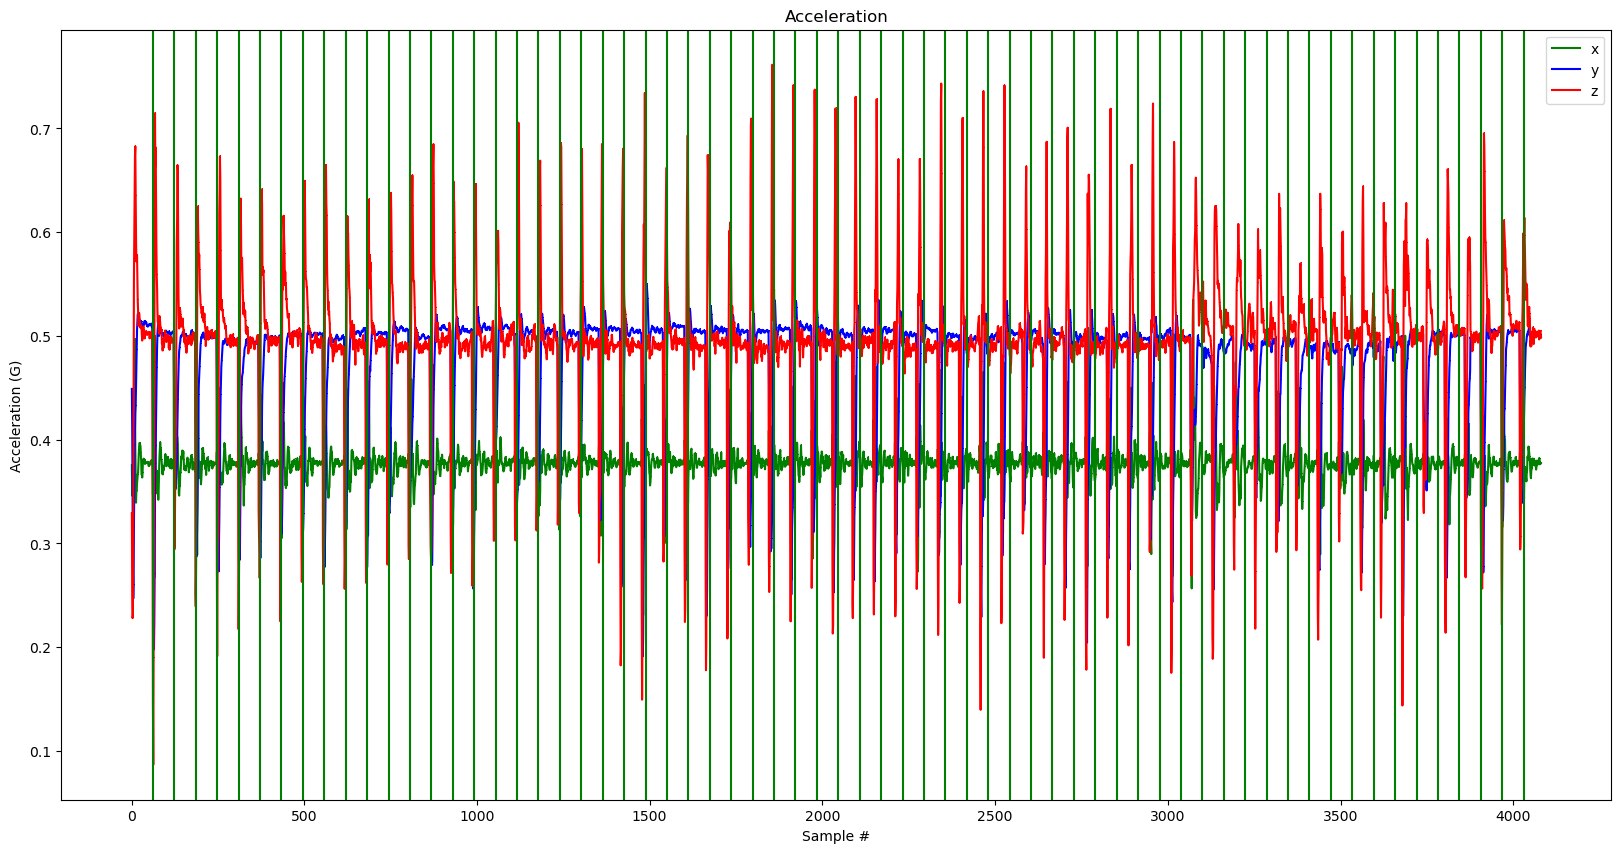

/tmp/ipykernel_9021/1815439325.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gx'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_9021/1815439325.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gy'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_9021/1815439325.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gz'], 'r.', label='z', linestyle='solid', marker=',')


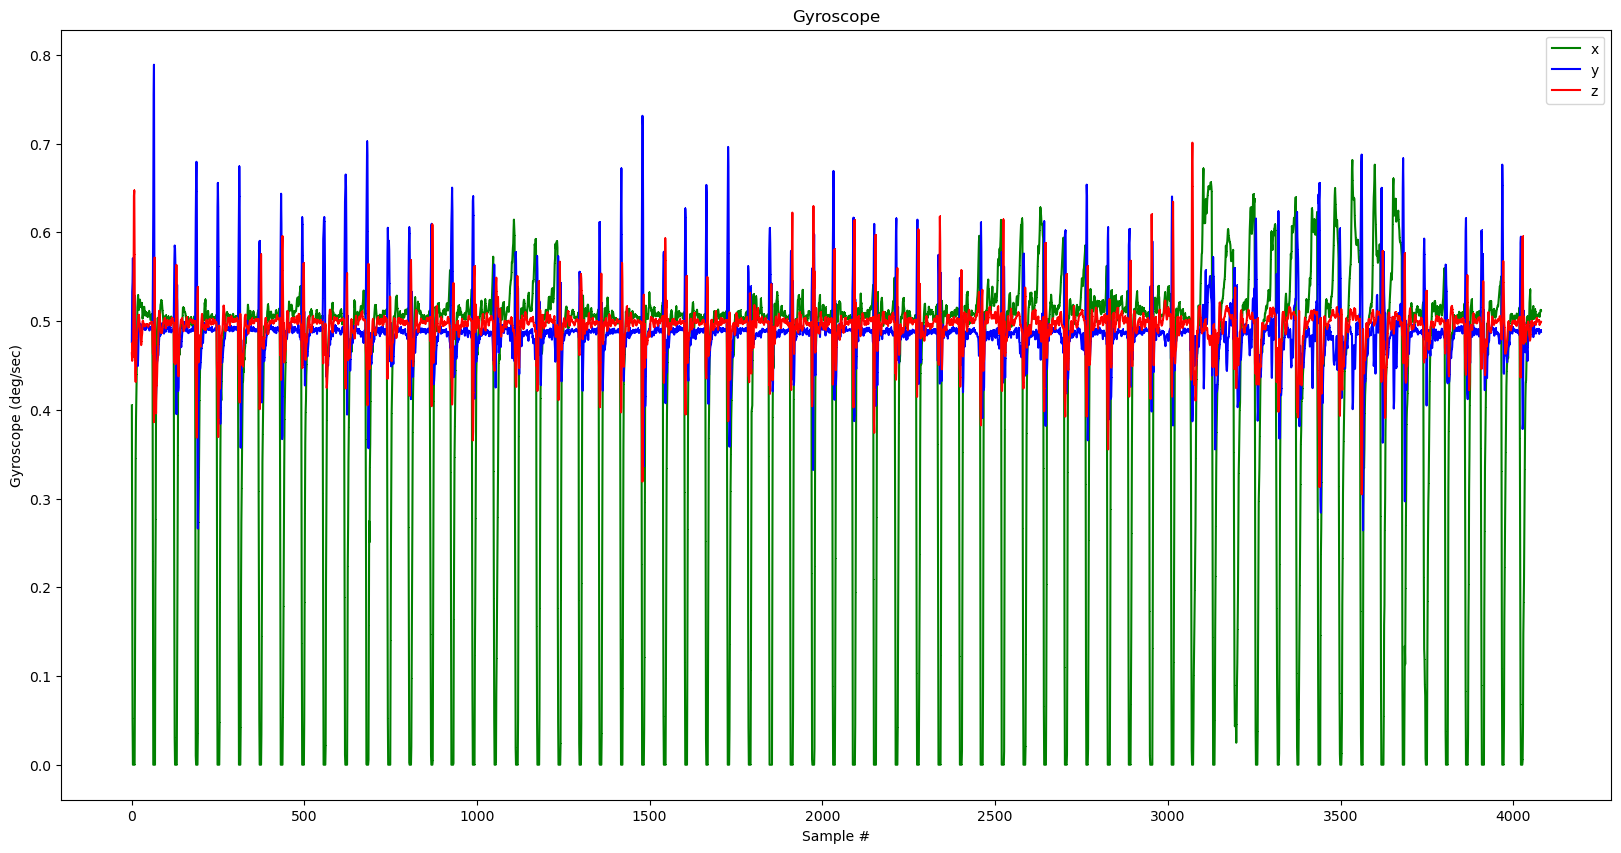

In [87]:
index = range(1, len(df['ax']) + 1)
NUM_SAMPLES=62


plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
#plt.axvline(x = 25, color = 'b', label = 'axvline - full height')
for i in range(1, len(df['ax']) + 1): 
    if i%NUM_SAMPLES ==0:
        plt.axvline(x = i, color = 'g')

plt.legend()
plt.show()


plt.plot(index, df['gx'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gy'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gz'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()



## Normalizing data from -1 to 1 

In [134]:
# Base parameters for the NN 
GESTURES = [
    "left_15",
    "up_15",
    "front_15"
]
NUM_GESTURES = len(GESTURES)
for i in range(NUM_GESTURES):
    df= pd.read_csv(f'data/{GESTURES[i]}.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","angX","angY","Actividad"]) 
    print(df['ax'].min())
    print(df['ax'].max())
    print(df['ay'].min())
    print(df['ay'].max())
    print(df['az'].min())
    print(df['az'].max())
    print(df['gx'].min())
    print(df['gx'].max())
    #After scalating the values we normalize
    #Aceleromter
    df['ax']=(df['ax'] - df['ax'].min()) / (df['ax'].max() - df['ax'].min())
    df['ay']=(df['ay'] - df['ay'].min()) / (df['ay'].max() - df['ay'].min())
    df['az']=(df['az'] - df['az'].min()) / (df['az'].max() - df['az'].min())
    #Gyroscope
    df['gx']=(df['gx'] - df['gx'].min()) / (df['gx'].max() - df['gx'].min())
    df['gy']=(df['gy'] - df['gy'].min()) / (df['gy'].max() - df['gy'].min())
    df['gz']=(df['gz'] - df['gz'].min()) / (df['gz'].max() - df['gz'].min())


    

-20818.0
1514.0
-25684.0
2422.0
-23974.0
25480.0
-32768.0
32767.0
-32768.0
17594.0
-21424.0
7570.0
-7282.0
11290.0
-16829.0
24447.0
-32768.0
12354.0
-27920.0
14834.0
-15862.0
32708.0
-32768.0
26226.0


In [2]:
#ESTA ES LA CELDA QUE SIRVE PARA CREAR EL TENSOR!!!!!

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "down_65",
    "slap_65"
]

SAMPLES_PER_GESTURE = 62

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
print(ONE_HOT_ENCODED_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")

    output = ONE_HOT_ENCODED_GESTURES[gesture_index]
    print(output)
    df= pd.read_csv(f'data/{GESTURES[gesture_index]}.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","Actividad"]) 
    #df= pd.read_csv(f'data/{GESTURES[gesture_index]}.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","angX","angY","Actividad"]) 
    #df= pd.read_csv(f'data/{GESTURES[gesture_index]}.csv', sep=',',names=["ax","ay","az","gx","gy","gz"]) 



    # calculate the number of gesture recordings in the file
    num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

    print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

    for i in range(num_recordings):
        tensor = []
        for j in range(SAMPLES_PER_GESTURE):
            index = i * SAMPLES_PER_GESTURE + j
            #print(index)
            # normalize the input data, between 0 to 1:
            # - acceleration is between: -4 to +4
            # - gyroscope is between: -2000 to +2000
            tensor += [
                  df['ax'][index] ,
                  df['ay'][index] ,
                  df['az'][index] ,
                  df['gx'][index] ,
                  df['gy'][index] ,
                  df['gz'][index] 
              ]

        inputs.append(tensor)
        outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print(inputs)
print(inputs.shape)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.12.0

[[1. 0.]
 [0. 1.]]
Processing index 0 for gesture 'down_65'.
[1. 0.]
	There are 64 recordings of the down_65 gesture.
Processing index 1 for gesture 'slap_65'.
[0. 1.]
	There are 65 recordings of the slap_65 gesture.
[[ 1.3340e+04 -2.5620e+03 -6.2000e+03 ... -8.0700e+03  9.9300e+02
  -3.2768e+04]
 [ 3.6340e+03 -9.9640e+03 -3.0040e+03 ... -3.7560e+03  4.2460e+03
  -1.5265e+04]
 [-1.2310e+04 -1.3340e+03 -3.0000e+01 ... -9.9170e+03  1.3700e+03
  -3.2768e+04]
 ...
 [-8.0500e+03  3.0000e+01  4.0000e+01 ... -9.4150e+03  9.4800e+02
  -2.2710e+03]
 [-8.8260e+03 -6.4060e+03 -1.5110e+04 ... -3.2768e+04  1.1549e+04
   6.4000e+01]
 [-1.1566e+04 -1.0914e+04 -9.7900e+03 ... -2.0796e+04  7.6900e+02
  -1.6890e+03]]
(129, 372)
Data set parsing and preparation complete.


In [3]:
print(outputs)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

## Splitting train and test data

In [4]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
print(num_inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

print(TRAIN_SPLIT)
print(TEST_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

129
77
102
Data set randomization and splitting complete.


## Building neural network model and training

In [6]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu',name="first_layer")) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu',name="second_layer"))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax',name="output_layer")) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600


2023-06-22 15:19:52.477428: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


77/77 [==============================] - 0s 2ms/step - loss: 0.4545 - mae: 0.4545 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 2/600
77/77 [==============================] - 0s 1ms/step - loss: 0.4545 - mae: 0.4545 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 3/600
77/77 [==============================] - 0s 1ms/step - loss: 0.4545 - mae: 0.4545 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 4/600
77/77 [==============================] - 0s 1ms/step - loss: 0.4545 - mae: 0.4545 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 5/600
77/77 [==============================] - 0s 1ms/step - loss: 0.4545 - mae: 0.4545 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 6/600
77/77 [==============================] - 0s 2ms/step - loss: 0.4416 - mae: 0.4416 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 7/600
77/77 [==============================] - 0s 1ms/step - loss: 0.4416 - mae: 0.4416 - val_loss: 0.4444 - val_mae: 0.4444
Epoch 8/600
77/77 [==============================] - 0s 1ms/step - loss: 0.4416 - mae: 0.4416 -

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (1, 50)                   18650     
                                                                 
 second_layer (Dense)        (1, 15)                   765       
                                                                 
 output_layer (Dense)        (1, 2)                    32        
                                                                 
Total params: 19,447
Trainable params: 19,447
Non-trainable params: 0
_________________________________________________________________


## Testing the model results

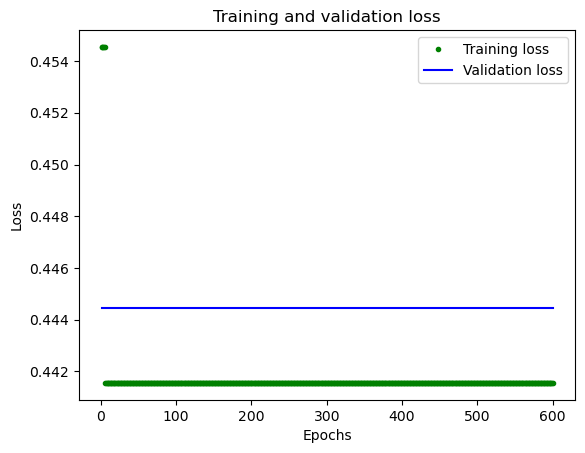

In [8]:
# graph the loss again skipping a bit of the start
SKIP = 0
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
###### use the model to predict the test inputs
predictions = model.predict(inputs_test)
#Transforming y pred to 1 and 0
predictions=(predictions == predictions.max(axis=1, keepdims=1)).astype(float)
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

1/1 [==============================] - 0s 46ms/step
predictions =
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
actual =
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [16]:
def undecode(twodimesnional_array):
    decoded_array=np.zeros(twodimesnional_array.shape[0])
    #print(decoded_array)
    cont=0
    for row in twodimesnional_array:
        #print(row)
        for i in range(len(row)):
            if row[i]==1.0:
                decoded_array[cont]=int(i)
        #print(decoded_array[cont])
        cont=cont+1
   
    return decoded_array

In [17]:
y_pred_decoded=undecode(predictions)
print(y_pred_decoded)

[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0.]


In [18]:
y_test_undecoded=undecode(outputs_test)
print(y_test_undecoded)

[1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1.]


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_undecoded, y_pred_decoded)
print(cm)
accuracy_score(y_test_undecoded, y_pred_decoded)

[[4 7]
 [5 9]]


0.52

In [20]:
#Save the model for the split
model.save("two_gestures_no_normalized.h5")

 # Generate a TensorFlow Lite Model

In [22]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
two_gestures_no_normalized = converter.convert()

# Save the model to disk
open("two_gestures_no_normalized.tflite", "wb").write(two_gestures_no_normalized)

# Convert the model to the TensorFlow Lite format with quantization
#def representative_dataset():
#  for i in range(500):
#    yield([x_train[i].reshape(1, 1)])

# Set the optimization flag.
#converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
#converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
#converter.inference_input_type = tf.int8
#converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
#converter.representative_dataset = representative_dataset
#model_tflite = converter.convert()

# Save the model to disk
#open("esp_split1/converted_model_split1.tflite", "wb").write(model_tflite)

2023-06-22 15:51:14.809997: I tensorflow/core/grappler/devices.cc:75] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2023-06-22 15:51:14.810069: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-06-22 15:51:14.824197: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-22 15:51:14.824217: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-22 15:51:14.832665: I tensorflow/compiler/mlir/lite/flatbuffer_export.cc:2116] Estimated count of arithmetic ops: 0.039 M  ops, equivalently 0.019 M  MACs


79728

# To convert to C++
We can then run this command to convert the model to c code.

xxd -i converted_model.tflite > model_data.cc

/tmp/ipykernel_5366/1637086497.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_5366/1637086497.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_5366/1637086497.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')


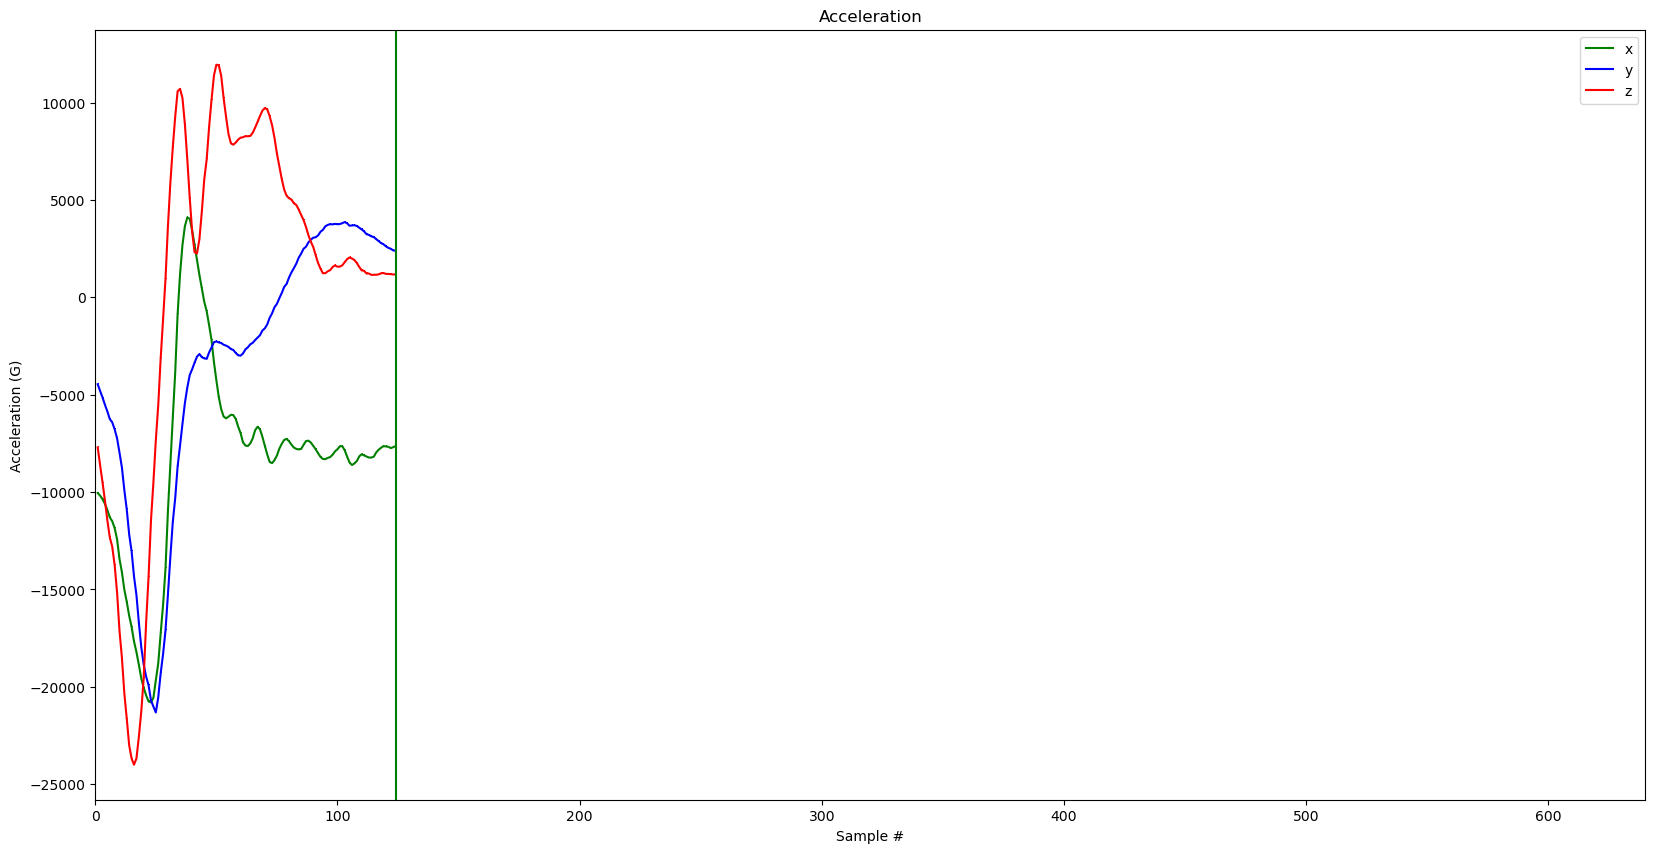

In [74]:
for i in range(NUM_GESTURES):
    df= pd.read_csv('data/test.csv', sep=',',names=[ "ax","ay","az","gx","gy","gz"])  
    # The acelerometer goes between -4g and +4g and the equivalent LSB is 8192
    df['ax']= df['ax']
    df['ay']= df['ay']
    df['az']= df['az']


    # The gyroscope goes between -500 and 500 and the equivalent LSB is 65.5
    df['gx']= df['gx']/65.5
    df['gy']= df['gy']/65.5
    df['gz']= df['gz']/65.5
    df.max()
    
index = range(1, len(df['ax']) + 1)
NUM_SAMPLES=124


plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
#plt.axvline(x = 25, color = 'b', label = 'axvline - full height')
for i in range(1, len(df['ax']) + 1): 
    if i%NUM_SAMPLES ==0:
        plt.axvline(x = i, color = 'g')
        

plt.xlim(0 ,640)
plt.legend()
plt.show()





/tmp/ipykernel_5366/1338596111.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_5366/1338596111.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_5366/1338596111.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')


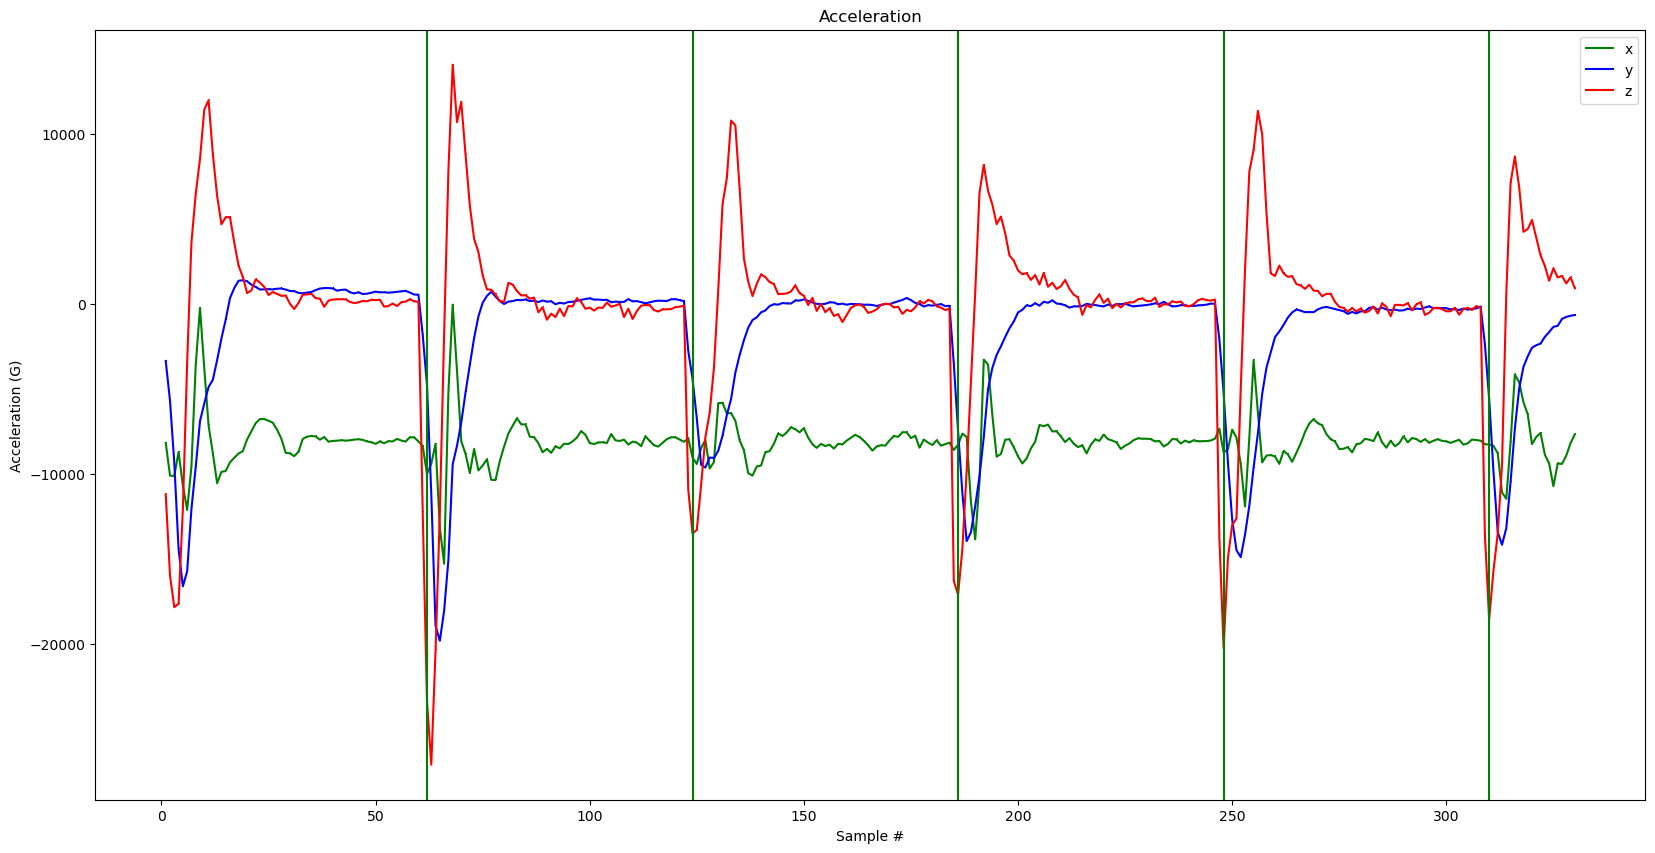

/tmp/ipykernel_5366/1338596111.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gx'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_5366/1338596111.py:37: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gy'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_5366/1338596111.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gz'], 'r.', label='z', linestyle='solid', marker=',')


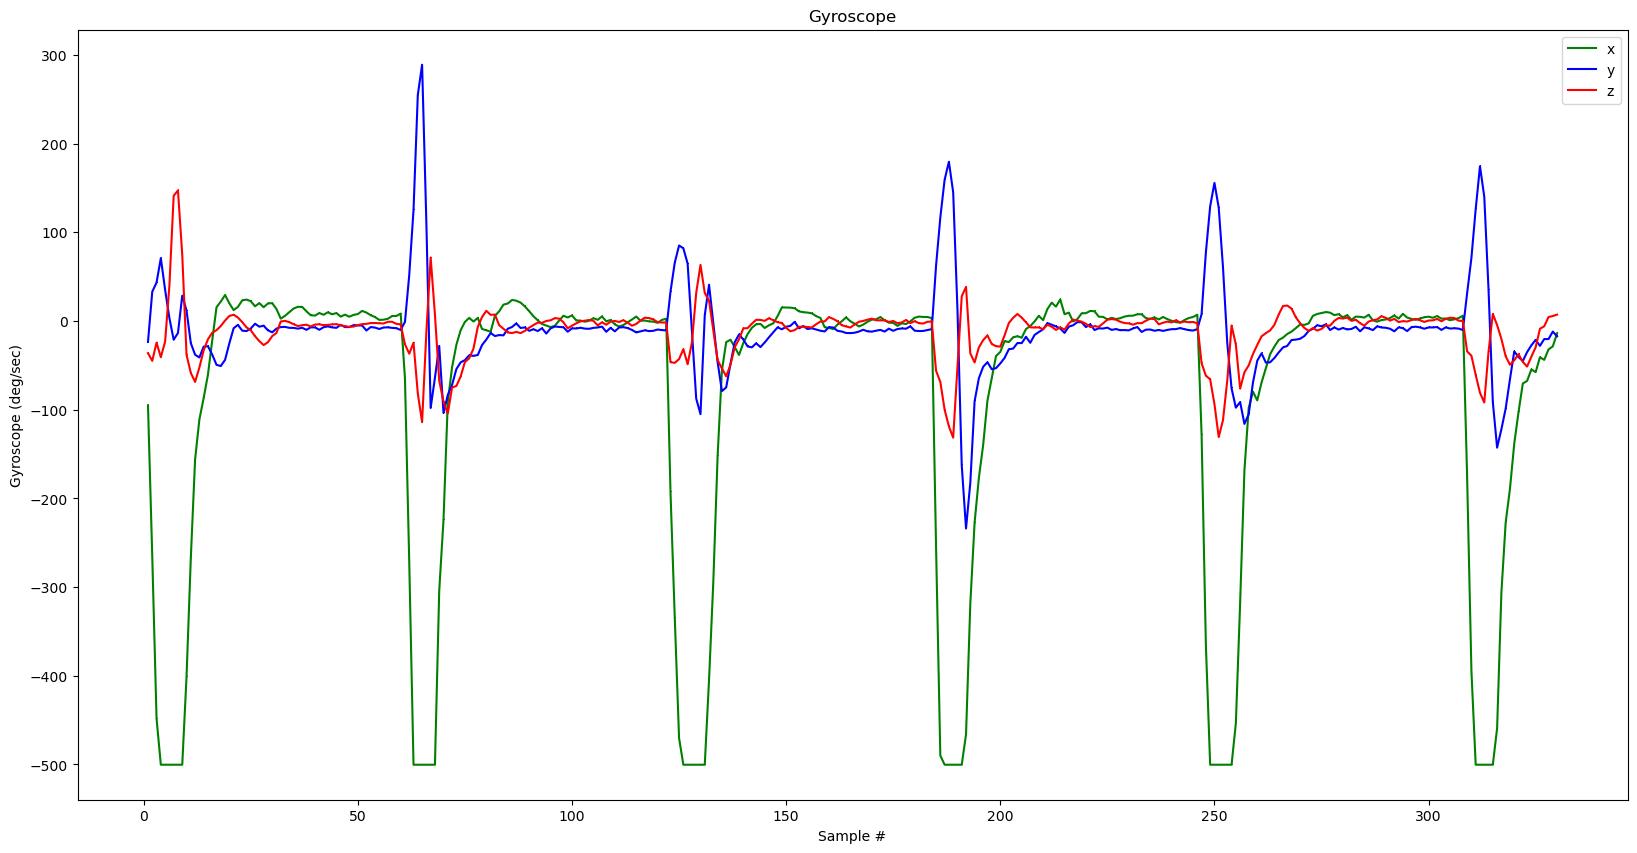

In [65]:
for i in range(NUM_GESTURES):
    df= pd.read_csv('data/test2.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","angX","angY","Actividad"])  
    # The acelerometer goes between -4g and +4g and the equivalent LSB is 8192
    df['ax']= df['ax']
    df['ay']= df['ay']
    df['az']= df['az']


    # The gyroscope goes between -500 and 500 and the equivalent LSB is 65.5
    df['gx']= df['gx']/65.5
    df['gy']= df['gy']/65.5
    df['gz']= df['gz']/65.5
    df.max()
    
index = range(1, len(df['ax']) + 1)
NUM_SAMPLES=62


plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
#plt.axvline(x = 25, color = 'b', label = 'axvline - full height')
for i in range(1, len(df['ax']) + 1): 
    if i%NUM_SAMPLES ==0:
        plt.axvline(x = i, color = 'g')

plt.legend()
plt.show()


plt.plot(index, df['gx'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gy'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gz'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()



/tmp/ipykernel_30815/2379995933.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_30815/2379995933.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_30815/2379995933.py:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')


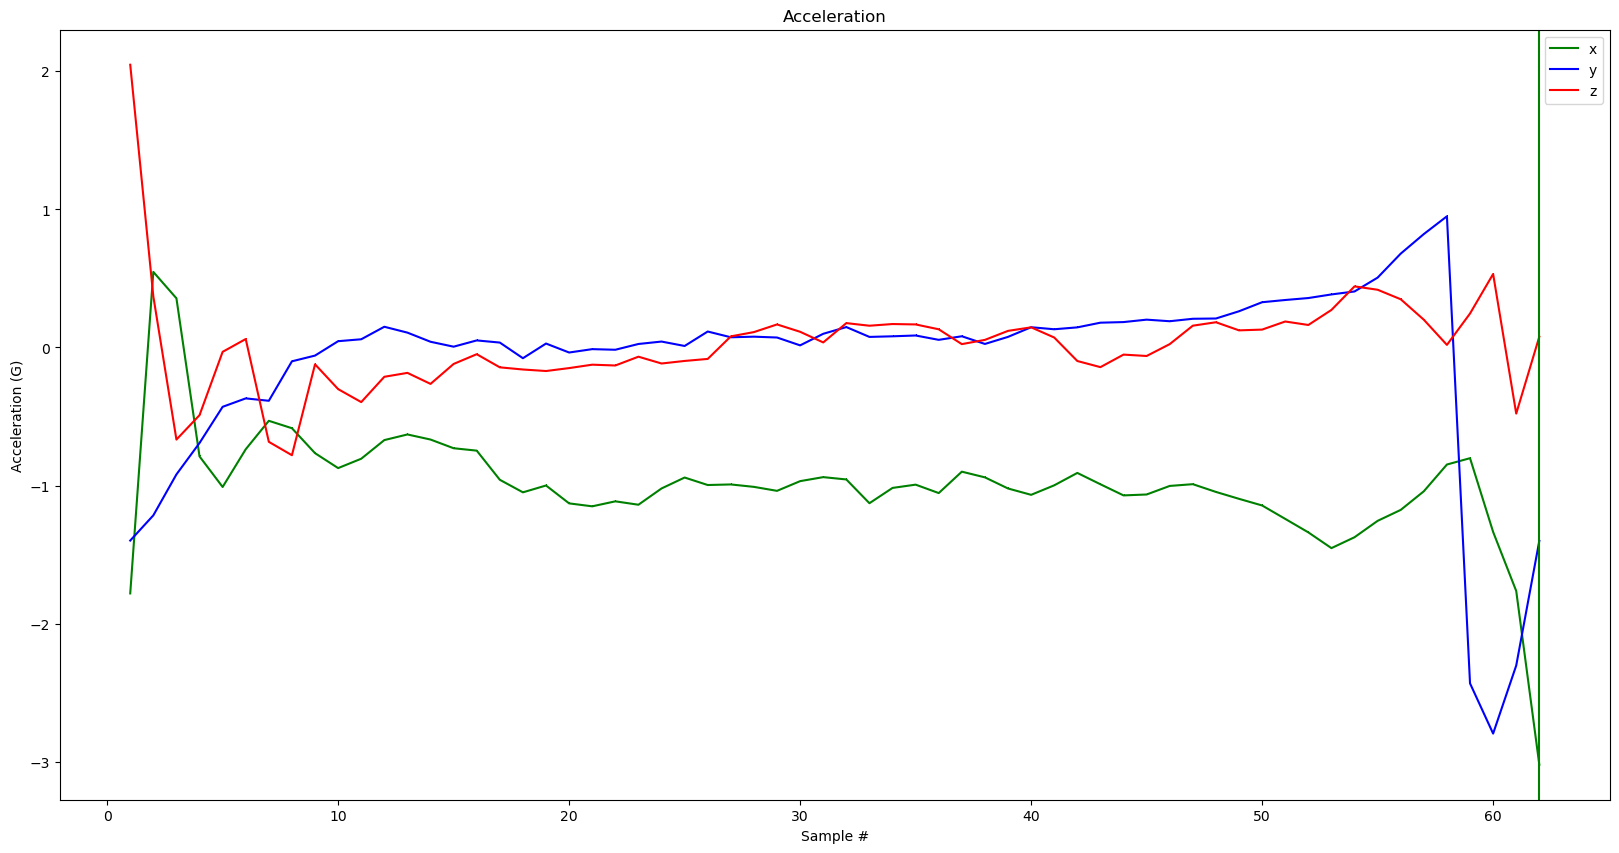

/tmp/ipykernel_30815/2379995933.py:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gx'], 'g.', label='x', linestyle='solid', marker=',')
/tmp/ipykernel_30815/2379995933.py:37: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gy'], 'b.', label='y', linestyle='solid', marker=',')
/tmp/ipykernel_30815/2379995933.py:38: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gz'], 'r.', label='z', linestyle='solid', marker=',')


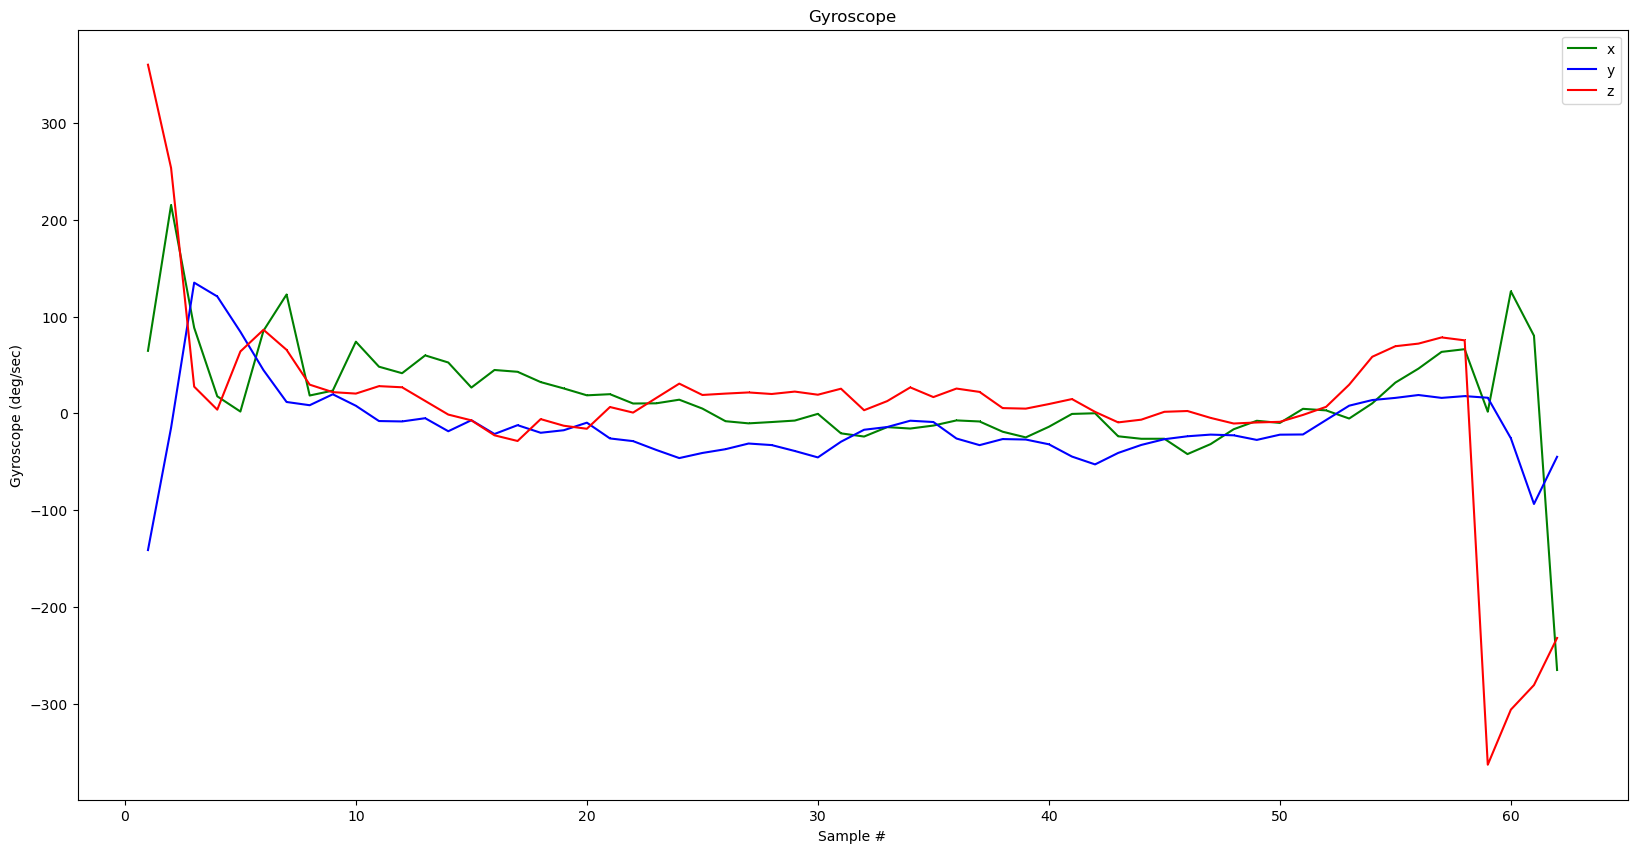

In [130]:
for i in range(NUM_GESTURES):
    df= pd.read_csv('data/test_front.csv', sep=',',names=["FechaHora", "NumPaquete", "IdClient", "ax","ay","az","gx","gy","gz","angX","angY","Actividad"])  
    # The acelerometer goes between -4g and +4g and the equivalent LSB is 8192
    df['ax']= df['ax']/8192
    df['ay']= df['ay']/8192
    df['az']= df['az']/8192


    # The gyroscope goes between -500 and 500 and the equivalent LSB is 65.5
    df['gx']= df['gx']/65.5
    df['gy']= df['gy']/65.5
    df['gz']= df['gz']/65.5
    df.max()
    
index = range(1, len(df['ax']) + 1)
NUM_SAMPLES=62


plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['ax'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['ay'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['az'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
#plt.axvline(x = 25, color = 'b', label = 'axvline - full height')
for i in range(1, len(df['ax']) + 1): 
    if i%NUM_SAMPLES ==0:
        plt.axvline(x = i, color = 'g')

plt.legend()
plt.show()


plt.plot(index, df['gx'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gy'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gz'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

